# Building Data Genome Project 2.0
## Exploratory data analysis of weather

Biam! (pic.biam@gmail.com)

In [1]:
# data and numbers
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.dpi'] = 80
import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')

import gc

# Dataset

* <code>timestamp</code>: date and time in the format YYYY-MM-DD hh:mm:ss. Local timezone.
* <code>site_id</code>: animal-code-name for the site.
* <code>apparentTemperature</code>: The apparent (or “feels like”) temperature in degrees Celsius (ºC).
* <code>cloudCover</code>: Portion of the sky covered in clouds, in [oktas](https://en.wikipedia.org/wiki/Cloud_cover).
* <code>dewPoint</code>: The dew point in degrees Celsius (ºC).
* <code>humidity</code>: The relative humidity, between <code>0</code> and <code>1</code>, inclusive.
* <code>precipIntensity</code>: The intensity (in milimeters of liquid water per hour) of precipitation occurring at the given time (mm/h)
* <code>precipType</code>:The type of precipitation occurring at the given time. If defined, this property will have one of the following values: <code>"rain"</code>, <code>"snow"</code>, or <code>"sleet"</code> (which refers to each of freezing rain, ice pellets, and “wintery mix”). (If <code>precipIntensity</code> is zero, then this property will not be defined.
* <code>pressure</code>: The sea-level air pressure in millibars (mbar or hPa).
* <code>summary</code>:A human-readable text summary of this data point.
* <code>temperature</code>:The air temperature in degrees Celsius (ºC).
* <code>uvIndex</code>: The UV index, between <code>0</code> and <code>11</code>, inclusive.
* <code>visibility</code>: The average visibility in meters (meters).
* <code>windBearing</code>: The direction that the wind is coming from in degrees, with true north at 0° and progressing clockwise (degrees).
* <code>windGust</code>: The wind gust speed in meters per second (m/s).
* <code>windSpeed</code>: The wind speed in meters per second (m/s).

In [2]:
path = "..\\data\\weather\\"

In [3]:
# Weather data
weather = pd.read_csv(path + "weather.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333288 entries, 0 to 333287
Data columns (total 16 columns):
timestamp              333288 non-null object
site_id                333288 non-null object
apparentTemperature    333288 non-null float64
cloudCover             332221 non-null float64
dewPoint               333288 non-null float64
humidity               333288 non-null float64
precipIntensity        333286 non-null float64
precipType             42373 non-null object
pressure               330764 non-null float64
summary                333288 non-null object
temperature            333288 non-null float64
uvIndex                333065 non-null float64
visibility             332810 non-null float64
windBearing            322341 non-null float64
windGust               332657 non-null float64
windSpeed              333288 non-null float64
dtypes: float64(12), object(4)
memory usage: 40.7+ MB


# Exploratory Data Analysis

## Missing values

In [4]:
# Percentage of missing values in each feature
weather.isna().sum()/len(weather)*100

timestamp               0.000000
site_id                 0.000000
apparentTemperature     0.000000
cloudCover              0.320144
dewPoint                0.000000
humidity                0.000000
precipIntensity         0.000600
precipType             87.286371
pressure                0.757303
summary                 0.000000
temperature             0.000000
uvIndex                 0.066909
visibility              0.143420
windBearing             3.284547
windGust                0.189326
windSpeed               0.000000
dtype: float64

## Correlation

In [5]:
# Drop categorical features
weather1 = weather.drop(["timestamp","site_id","precipType","summary"], axis=1)

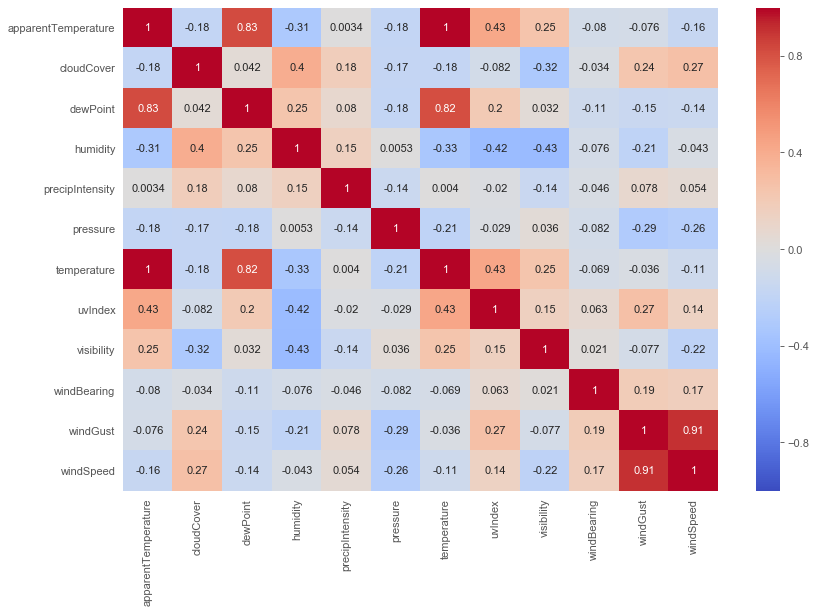

In [6]:
# Plot heatmap
sns.heatmap(weather1.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

In [7]:
del(weather1)

## Weather features distribution

In [4]:
#colors = ["crimson","mediumvioletred","orangered","gold","yellowgreen","lightseagreen","royalblue","rebeccapurple","slategray"]
colors = ["yellowgreen","dodgerblue","slategray"]

### Grouping weather summary categories

In [9]:
# Creates temporal dataframe with count and percentage
temp = pd.DataFrame(weather.groupby("summary").count().timestamp).rename(columns={"timestamp":"Count"})
temp["Pct"] = temp.Count * 100 / temp.Count.sum()
temp = temp.reset_index()
temp

,summary,Count,Pct
0,Breezy,4,0.001200
1,Breezy and Humid,8,0.002400
2,Breezy and Overcast,26,0.007801
3,Breezy and Partly Cloudy,8,0.002400
4,Clear,128465,38.544742
5,Drizzle,14,0.004201
6,Foggy,6140,1.842251
7,Heavy Rain,210,0.063009
8,Heavy Rain and Breezy,2,0.000600
9,Heavy Rain and Windy,8,0.002400


In [10]:
# Creates column with fewer categories baed on percentage
temp["Category"] = temp.apply(lambda x: x['summary'] if x['Pct']>1 else "Other", axis=1)
temp = temp.drop(["summary","Pct"], axis=1).groupby("Category").sum()
temp

,Count
Category,
Clear,128465
Foggy,6140
Humid,6452
Humid and Mostly Cloudy,4763
Humid and Partly Cloudy,3762
Light Rain,7305
Mostly Cloudy,69173
Other,4772
Overcast,51424


### Pie plot

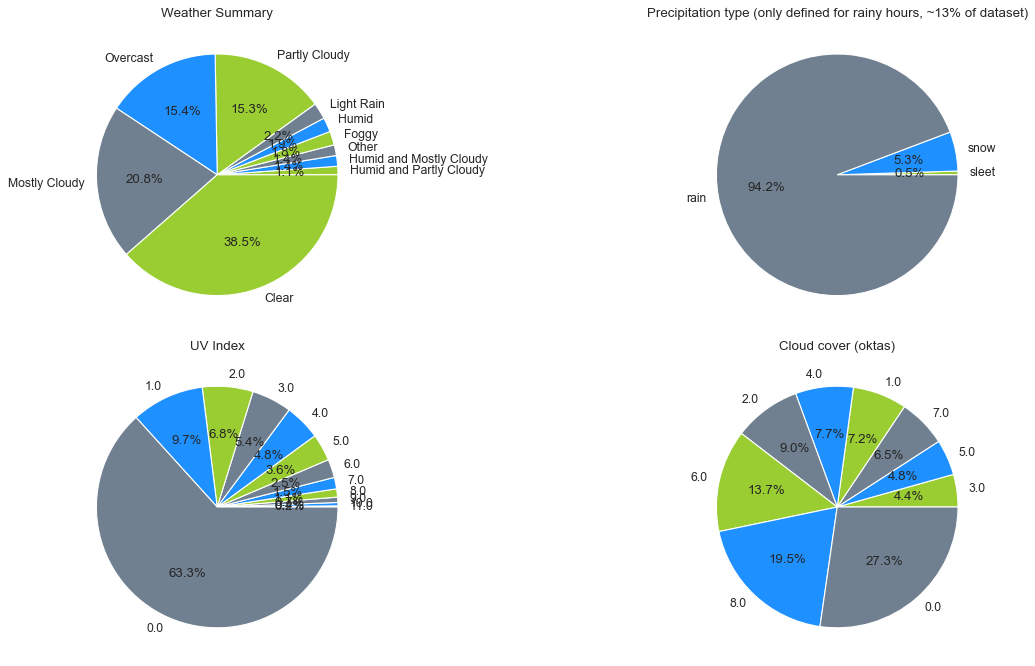

In [24]:
# Make square figures and axes
f = plt.figure(1, figsize=(20,16))
the_grid = GridSpec(3, 2)

# Temporal dataframe with weather summary counts
temp_labels = temp["Count"].sort_values().index
temp_counts = temp["Count"].sort_values()
# Weather summary pie chart
plt.subplot(the_grid[0, 0], aspect=1, title='Weather Summary')
g1 = plt.pie(temp_counts, labels=temp_labels, autopct='%1.1f%%', shadow=False, colors=colors)

# Temporal dataframe with precipitation type counts
temp1 = pd.DataFrame(weather.groupby("precipType").count().timestamp).rename(columns={"timestamp":"Count"})
temp_labels1 = temp1["Count"].sort_values().index
temp_counts1 = temp1["Count"].sort_values()
# Precipitation Type pie chart
plt.subplot(the_grid[0, 1], aspect=1, title='Precipitation type (only defined for rainy hours, ~13% of dataset)')
g2 = plt.pie(temp_counts1, labels=temp_labels1, autopct='%1.1f%%', shadow=False, colors=colors)

# Temporal dataframe with UV Index counts
temp1 = pd.DataFrame(weather.groupby("uvIndex").count().timestamp).rename(columns={"timestamp":"Count"})
temp_labels1 = temp1["Count"].sort_values().index
temp_counts1 = temp1["Count"].sort_values()
# UV Index pie chart
plt.subplot(the_grid[1, 0], aspect=1, title='UV Index')
g3 = plt.pie(temp_counts1, labels=temp_labels1, autopct='%1.1f%%', shadow=False, colors=colors)

# Temporal dataframe with cloud cover counts
temp1 = pd.DataFrame(weather.groupby("cloudCover").count().timestamp).rename(columns={"timestamp":"Count"})
temp_labels1 = temp1["Count"].sort_values().index
temp_counts1 = temp1["Count"].sort_values()
# Cloud cover pie chart
plt.subplot(the_grid[1, 1], aspect=1, title='Cloud cover (oktas)')
g4 = plt.pie(temp_counts1, labels=temp_labels1, autopct='%1.1f%%', shadow=False, colors=colors)

# Figure title
#plt.suptitle('Weather dataset categorical features', fontsize=22)

plt.subplots_adjust(wspace = 0, hspace = 0.1)
plt.show()
#plt.tight_layout()

In [25]:
f.savefig("..\\figures\\weather_cat.pdf", bbox_inches='tight')
f.savefig("..\\figures\\weather_cat.png", dpi=72, bbox_inches='tight')

Text(0.5, 0.98, 'Wind Bearing')

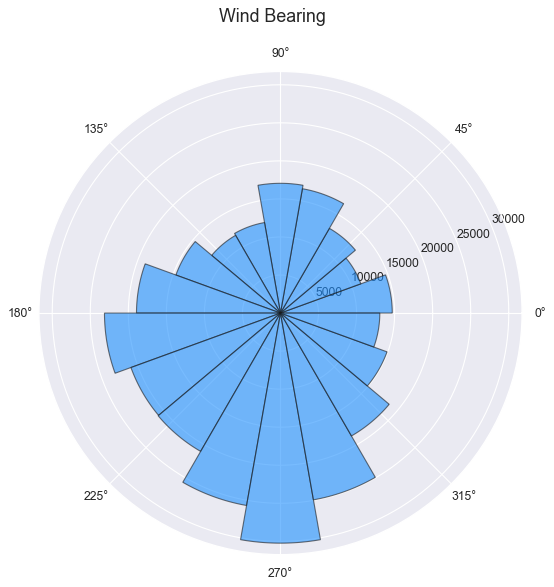

In [22]:
sns.set(rc={'figure.figsize':(8,8)})

# Wind direction (radial plot)
degrees = weather["windBearing"]
radians = np.deg2rad(weather["windBearing"])
bin_size = 20
a , b = np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
# Wind direction plot
plt.subplot(aspect=2, projection='polar')
g4 = plt.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color="dodgerblue", alpha=0.6, edgecolor='k')
# Figure title
plt.suptitle('Wind Bearing', fontsize=16)

In [5]:
len(weather)

333288

### Countplots and histograms

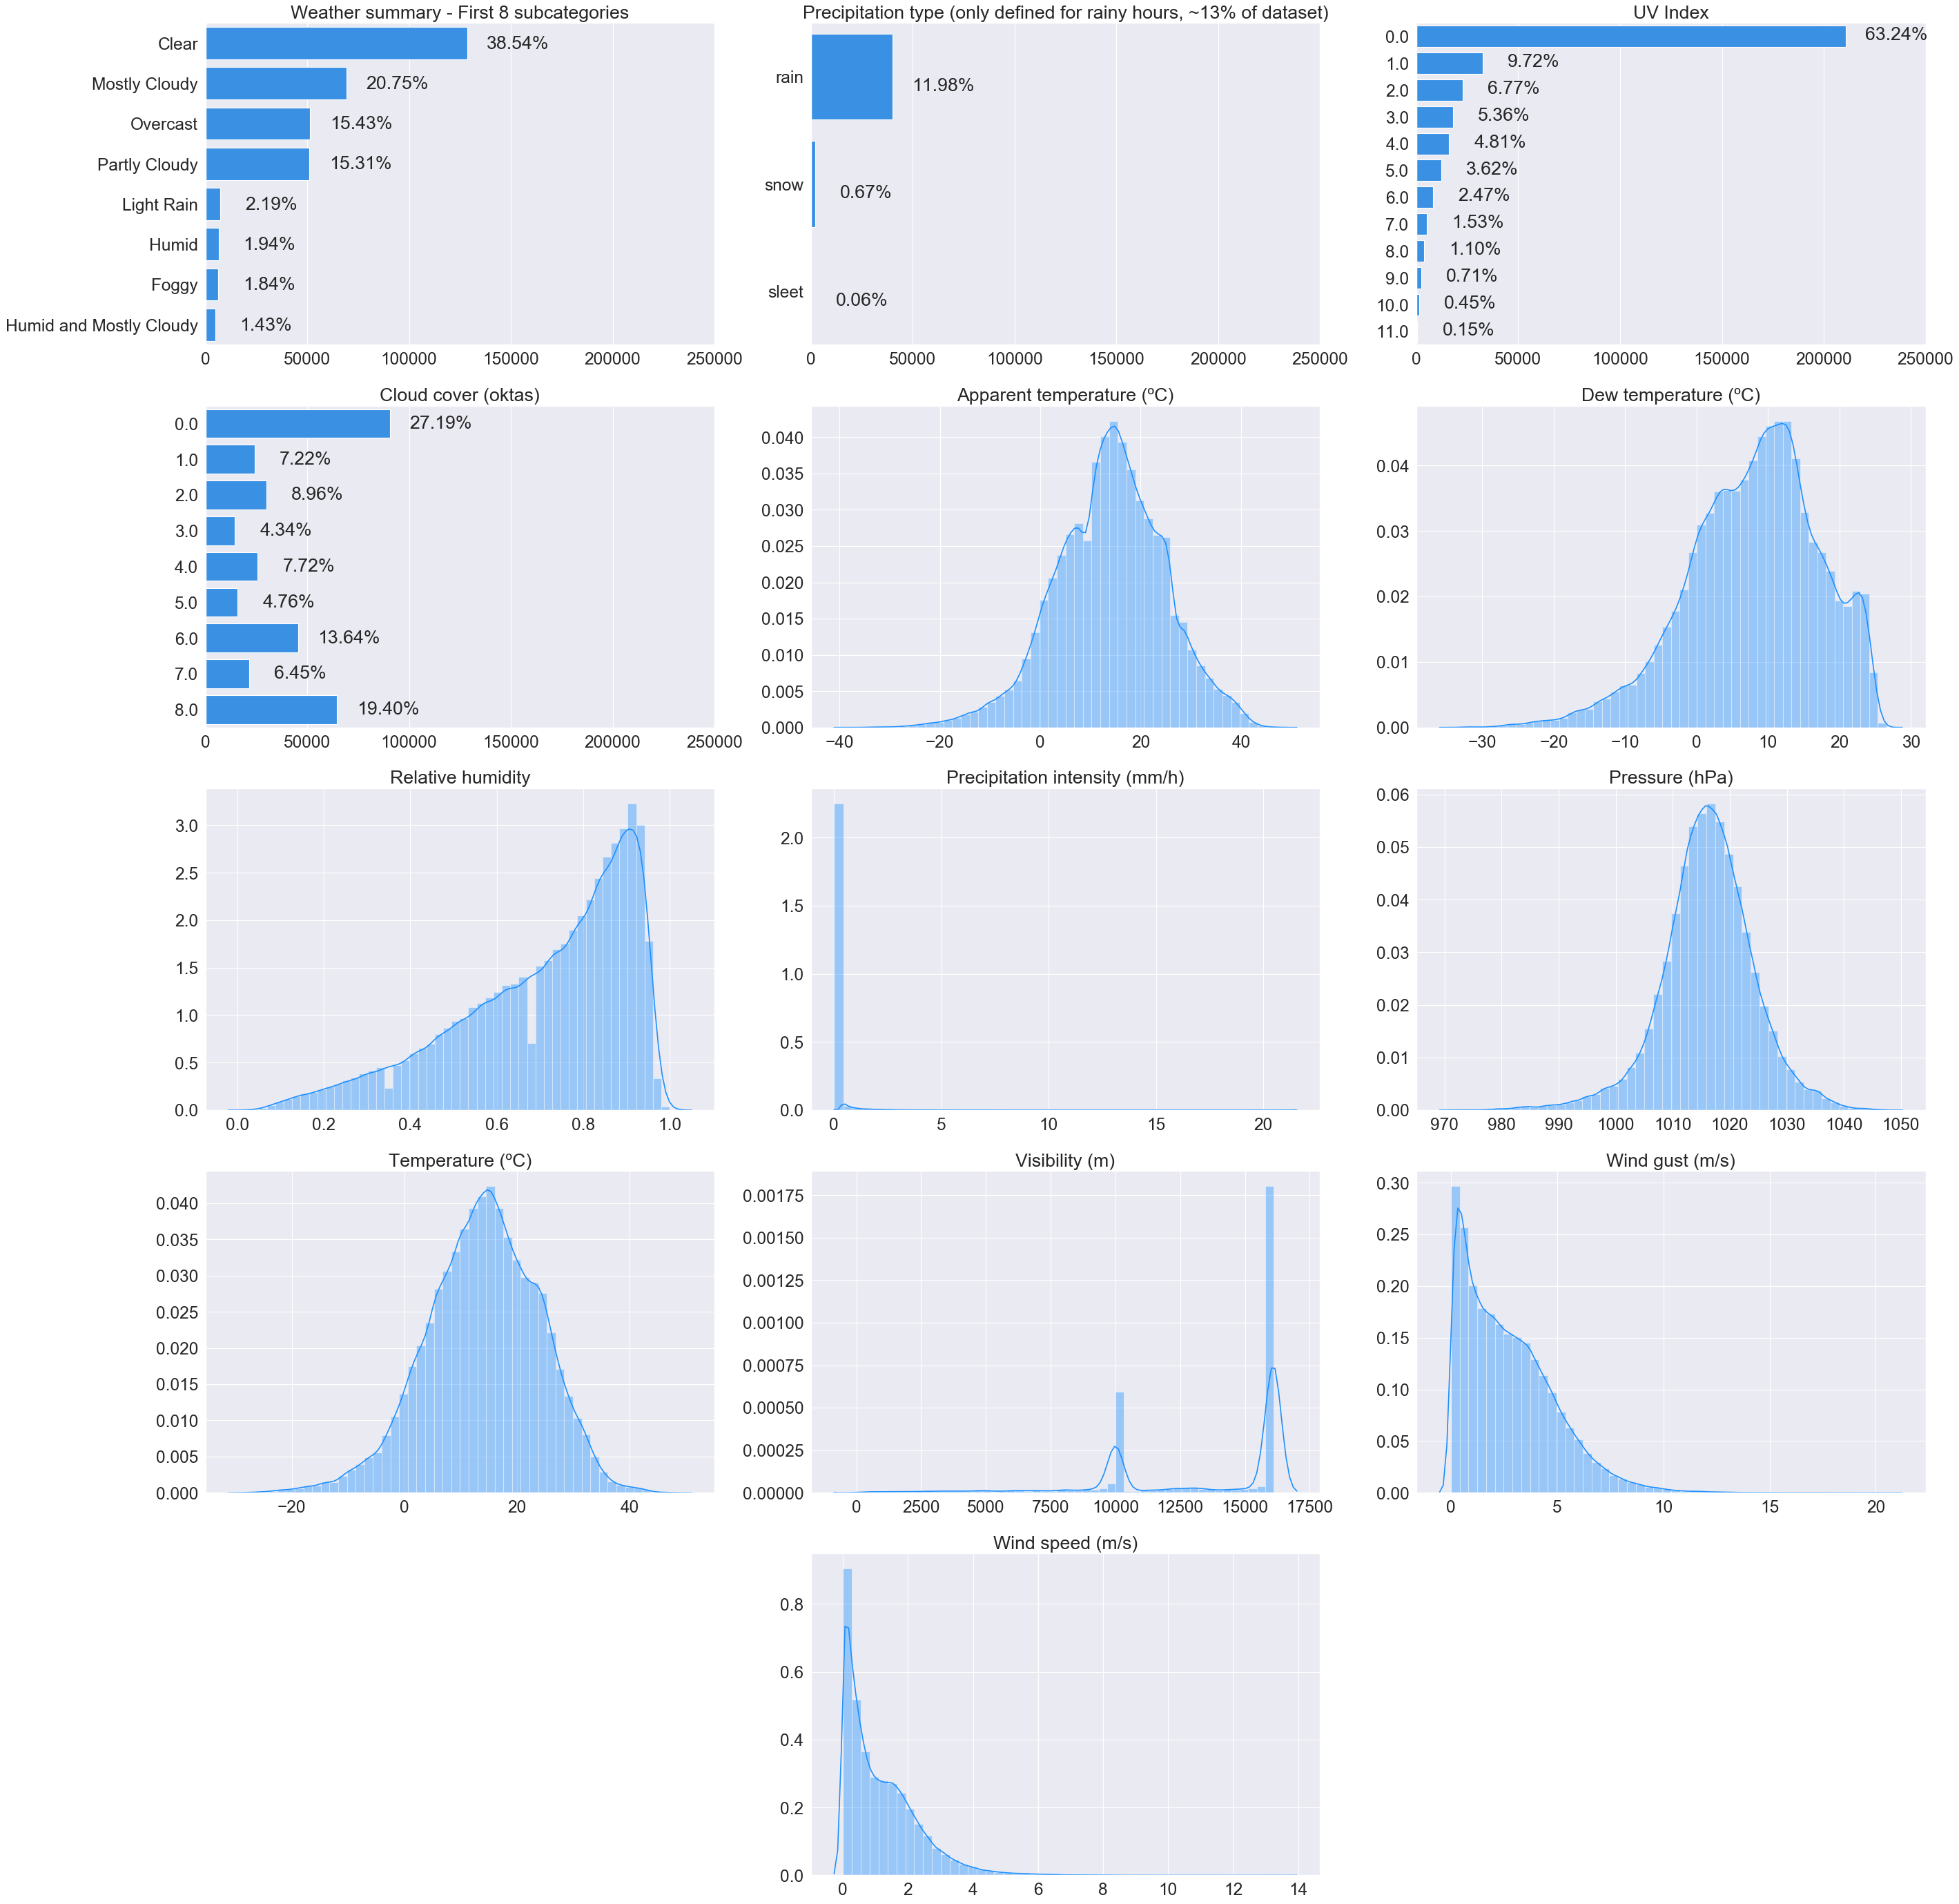

In [10]:
sns.set(rc={'figure.figsize':(36,35)})
sns.set(font_scale = 2)
f, axes = plt.subplots(5, 3)
axes = axes.flatten()

color = "dodgerblue"

# Weather summary countplot in decreasing order
ax0 = axes[0]
g0 = sns.countplot(data=weather, y="summary", color= color, orient="h", ax=ax0, order = weather['summary'].value_counts().iloc[:8].index)
ax0.title.set_text('Weather summary - First 8 subcategories')
ax0.set(ylabel="", xlabel="", xlim=(0,250000))
# adds percentage    
total = float(len(weather)) # number of rows
for p in g0.patches:
    width = p.get_width()
    g0.text(width + 25000,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
    
# Precipitation type countplot in decreasing order
ax1 = axes[1]
g1 = sns.countplot(data=weather, y="precipType", color= color, orient="h", ax=ax1, order = weather['precipType'].value_counts().index)
ax1.title.set_text('Precipitation type (only defined for rainy hours, ~13% of dataset)')
ax1.set(ylabel="", xlabel="", xlim=(0,250000))
# adds percentage    
total = float(len(weather)) # number of rows
for p in g1.patches:
    width = p.get_width()
    g1.text(width + 25000,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 

# UV Index countplot in decreasing order
ax2 = axes[2]
g2 = sns.countplot(data=weather, y="uvIndex", color= color, orient="h", ax=ax2, order = weather['uvIndex'].value_counts().index)
ax2.title.set_text('UV Index')
ax2.set(ylabel="", xlabel="", xlim=(0,250000))
# adds percentage    
total = float(len(weather)) # number of rows
for p in g2.patches:
    width = p.get_width()
    g2.text(width + 25000,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 

# Cloud cover countplot in decreasing order
ax3 = axes[3]
g3 = sns.countplot(data=weather, y="cloudCover", color= color, orient="h", ax=ax3)
ax3.title.set_text('Cloud cover (oktas)')
ax3.set(ylabel="", xlabel="", xlim=(0,250000))
# adds percentage    
total = float(len(weather)) # number of rows
for p in g3.patches:
    width = p.get_width()
    g3.text(width + 25000,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 

# "apparentTemperature" histogram
ax4 = axes[4]
g4 = sns.distplot(weather["apparentTemperature"].dropna(), ax=ax4, color=color)
ax4.title.set_text('Apparent temperature (ºC)')
ax4.set(xlabel="")

# "dewPoint" histogram
ax5 = axes[5]
g5 = sns.distplot(weather["dewPoint"].dropna(), ax=ax5, color=color)
ax5.title.set_text('Dew temperature (ºC)')
ax5.set(xlabel="")

# "humidity" histogram
ax6 = axes[6]
g6 = sns.distplot(weather["humidity"].dropna(), ax=ax6, color=color)
ax6.title.set_text('Relative humidity')
ax6.set(xlabel="")

# "precipIntensity" histogram
ax7 = axes[7]
g7 = sns.distplot(weather["precipIntensity"].dropna(), ax=ax7, color=color)
ax7.title.set_text('Precipitation intensity (mm/h)')
ax7.set(xlabel="")

# "pressure" histogram
ax8 = axes[8]
g8 = sns.distplot(weather["pressure"].dropna(), ax=ax8, color=color)
ax8.title.set_text('Pressure (hPa)')
ax8.set(xlabel="")

# "Temperature" histogram
ax9 = axes[9]
g9 = sns.distplot(weather["temperature"].dropna(), ax=ax9, color=color)
ax9.title.set_text('Temperature (ºC)')
ax9.set(xlabel="")

# "visibility" histogram
ax10 = axes[10]
g10 = sns.distplot(weather["visibility"].dropna(), ax=ax10, color=color)
ax10.title.set_text('Visibility (m)')
ax10.set(xlabel="")

# "windGust" histogram
ax11 = axes[11]
g11 = sns.distplot(weather["windGust"].dropna(), ax=ax11, color=color)
ax11.title.set_text('Wind gust (m/s)')
ax11.set(xlabel="")

# "windSpeed" histogram
ax12 = axes[13]
g12 = sns.distplot(weather["windSpeed"].dropna(), ax=ax12, color=color)
ax12.title.set_text('Wind speed (m/s)')
ax12.set(xlabel="")

"""# Sets fontsize
for ax in axes:
    ax.title.set_size(14)"""

# Remove empty axes
f.delaxes(axes[12])
f.delaxes(axes[14])

plt.tight_layout()
#plt.show()

In [11]:
f.savefig("..\\figures\\weather_features.pdf", bbox_inches='tight')
f.savefig("..\\figures\\weather_features.png", dpi=72, bbox_inches='tight')

## Temporal analysis

As observed in the correlation plot, the following features are highly correlated:<br>
<ul>
    <li><code>apparentTemperature</code> and <code>temperature</code></li>
    <li><code>apparentTemperature</code> and <code>dewPoint</code></li>
    <li><code>dewPoint</code> and <code>temperature</code></li>
    <li><code>windGust</code> and <code>windSpeed</code>
</ul>
The features <code>apparentTemperature</code> and <code>windSpeed</code> will be kept for the following plots. <code>dewPoint</code>, <code>windGust</code>, <code>precipIntensity</code> and <code>visibility</code> won't be eincluded in the temporal analysis (due to correlation or behaviour).

### Behaviour by month

In [13]:
# datetime indexes
times = pd.DatetimeIndex(weather.timestamp)

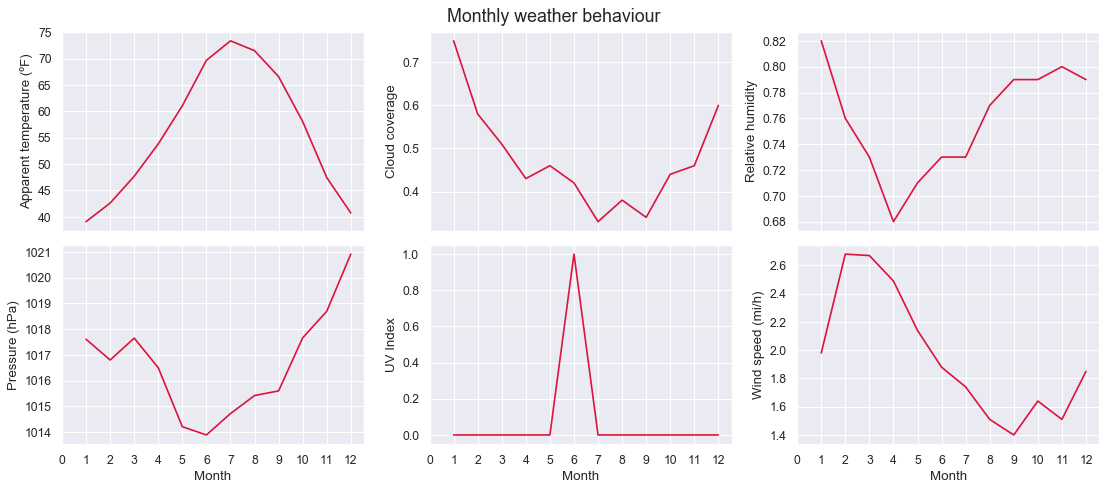

In [14]:
# Median for each month
sns.set(rc={"figure.figsize": (14, 6)})
# sns.set(font_scale = 1)
f, axes = plt.subplots(2, 3, sharex=True)
axes = axes.flatten()
color = colors[1]

# Creates a temporal dataframe grouped by day of the year
temp = pd.DataFrame(
    weather.groupby([times.month]).median()[
        [
            "apparentTemperature",
            "cloudCover",
            "humidity",
            "pressure",
            "uvIndex",
            "windSpeed",
        ]
    ]
).reset_index()

# plots
ax1 = axes[0]
g1 = sns.lineplot(data=temp, x="timestamp", y="apparentTemperature", ax=ax1, color = color)
#ax1.title.set_text("Apparent temperature")
ax1.set(ylabel="Apparent temperature (ºF)")

ax2 = axes[1]
g2 = sns.lineplot(data=temp, x="timestamp", y="cloudCover", ax=ax2, color = color)
#ax2.title.set_text("Cloud coverage")
ax2.set(ylabel="Cloud coverage")

ax3 = axes[2]
g3 = sns.lineplot(data=temp, x="timestamp", y="humidity", ax=ax3, color = color)
#ax3.title.set_text("Relative humidity")
ax3.set(ylabel="Relative humidity")

ax4 = axes[3]
g4 = sns.lineplot(data=temp, x="timestamp", y="pressure", ax=ax4, color = color)
#ax4.title.set_text("Pressure")
ax4.set(ylabel="Pressure (hPa)")

ax5 = axes[4]
g5 = sns.lineplot(data=temp, x="timestamp", y="uvIndex", ax=ax5, color = color)
#ax5.title.set_text("UV Index")
ax5.set(ylabel="UV Index")

ax6 = axes[5]
g6 = sns.lineplot(data=temp, x="timestamp", y="windSpeed", ax=ax6, color = color)
#ax6.title.set_text("Wind Speed")
ax6.set(ylabel="Wind speed (mi/h)")

# Customize axes
for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="Month")  # X label
    ax.set_xticks(range(13))  # X range

# Figure title
plt.suptitle('Monthly weather behaviour', y=1.02, fontsize=16)

f.tight_layout()

In [15]:
f.savefig("..\\figures\\weather_month.pdf", bbox_inches='tight')
f.savefig("..\\figures\\weather_month.png", dpi=72, bbox_inches='tight')

<code>apparentTemperature</code>, <code>humidity</code> and <code>windSpeed</code> will be plotted separately for each <code>site_id</code>.

Text(0.5, 1.02, 'Monthly apparent temperature behaviour by site')

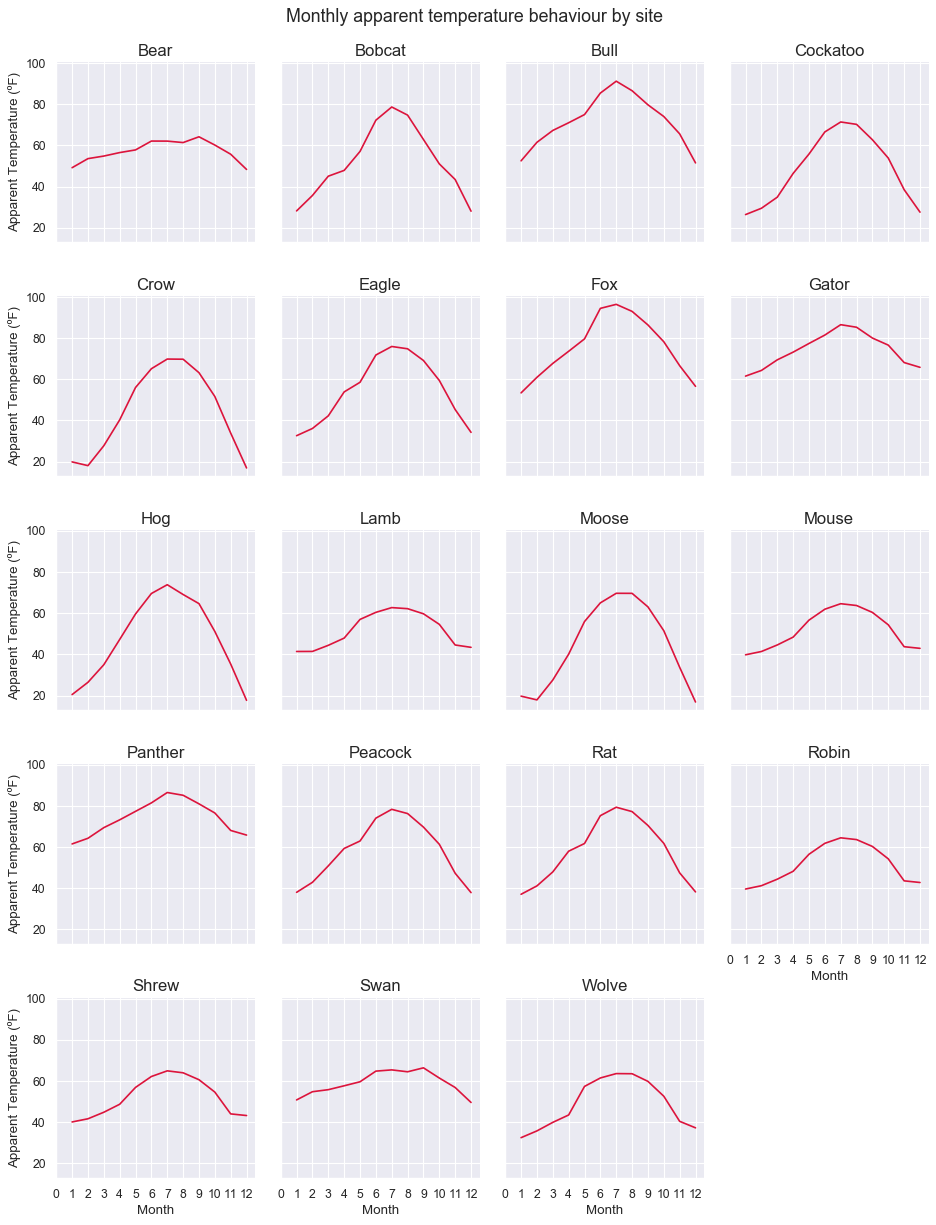

In [52]:
# Creates a temporal dataframe grouped by site and month
temp = pd.DataFrame(weather.groupby(["site_id", times.month]).median()["apparentTemperature"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "apparentTemperature", color=colors[1])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Month", y_var="Apparent Temperature (ºF)")
g.set(xticks=range(13))
# Figure title
plt.suptitle('Monthly apparent temperature behaviour by site', y=1.02, fontsize=16)

Text(0.5, 1.02, 'Monthly relative humidity behaviour by site')

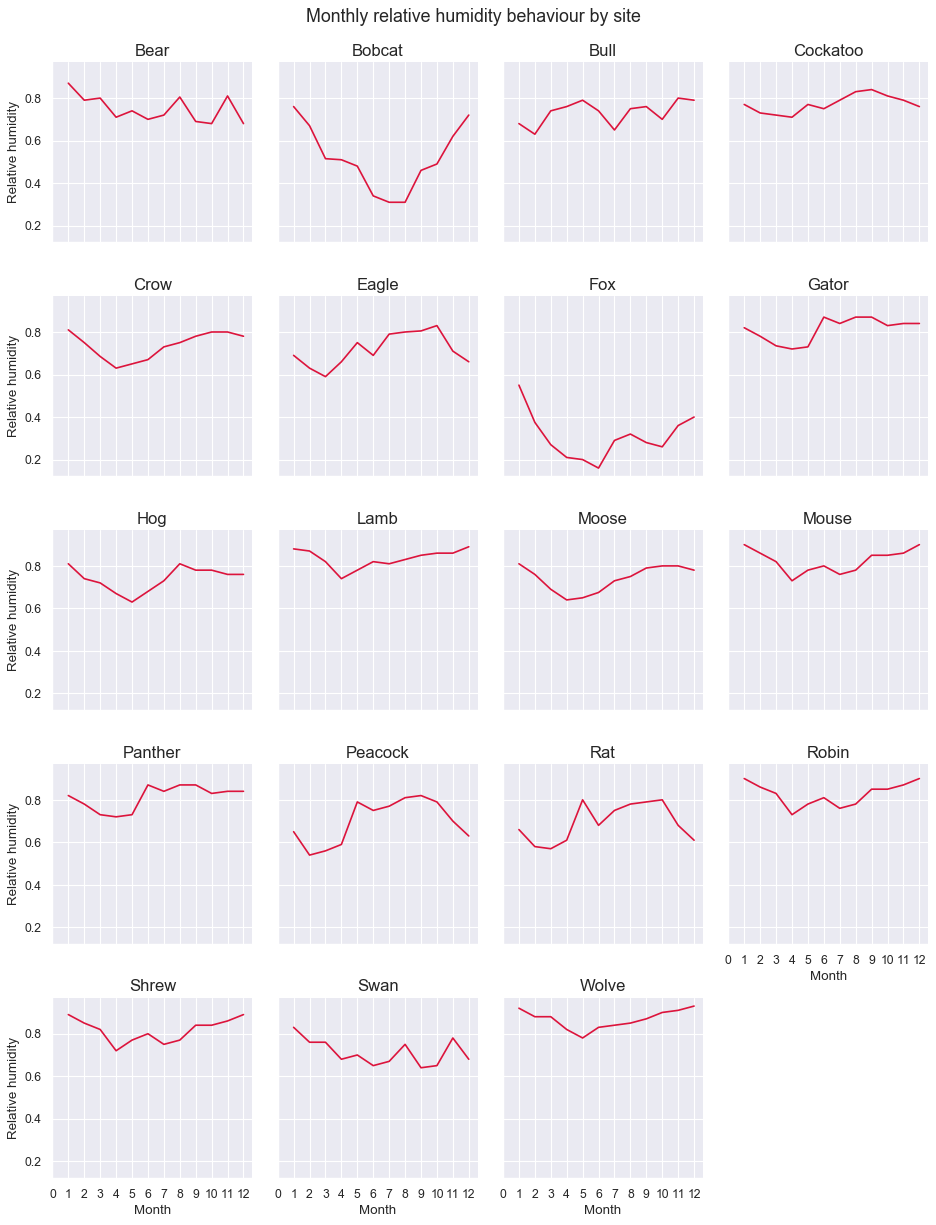

In [53]:
# Creates a temporal dataframe grouped by site and month
temp = pd.DataFrame(weather.groupby(["site_id", times.month]).median()["humidity"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "humidity", color=colors[1])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Month", y_var="Relative humidity")
g.set(xticks=range(13))
# Figure title
plt.suptitle('Monthly relative humidity behaviour by site', y=1.02, fontsize=16)

Text(0.5, 1.02, 'Monthly wind speed behaviour by site')

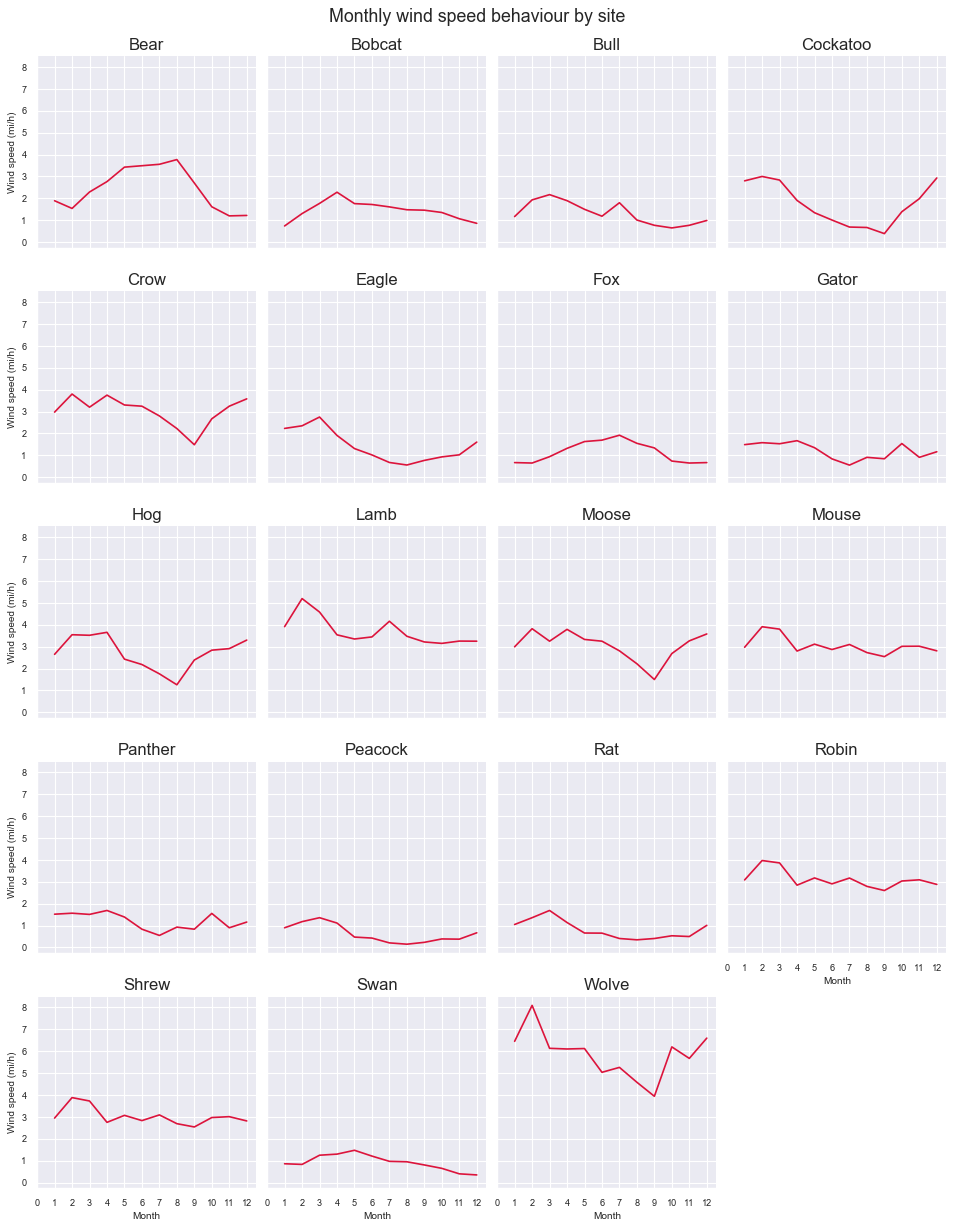

In [62]:
# Creates a temporal dataframe grouped by site and month
temp = pd.DataFrame(weather.groupby(["site_id", times.month]).median()["windSpeed"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "windSpeed", color=colors[1])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Month", y_var="Wind speed (mi/h)")
g.set(xticks=range(13))
# Figure title
plt.suptitle('Monthly wind speed behaviour by site', y=1.02, fontsize=16)

### Behaviour by hour of the day

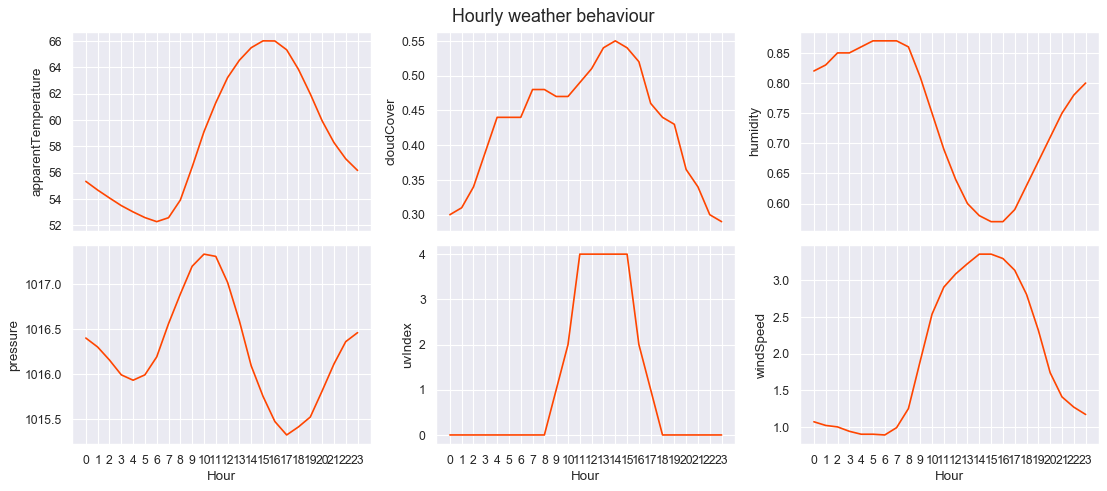

In [16]:
# Median for each hour
sns.set(rc={"figure.figsize": (14, 6)})
#sns.set(font_scale=0.8)
f, axes = plt.subplots(2, 3, sharex=True)
axes = axes.flatten()
color = colors[2]

# Creates a temporal dataframe grouped by hour
temp = pd.DataFrame(
    weather.groupby([times.hour]).median()[
        [
            "apparentTemperature",
            "cloudCover",
            "humidity",
            "pressure",
            "uvIndex",
            "windSpeed",
        ]
    ]
).reset_index()

# plots
ax1 = axes[0]
g1 = sns.lineplot(data=temp, x="timestamp", y="apparentTemperature", ax=ax1, color = color)
#ax1.title.set_text("Apparent temperature")
ax1.set(xlabel="Apparent temperature (ºF)")

ax2 = axes[1]
g2 = sns.lineplot(data=temp, x="timestamp", y="cloudCover", ax=ax2, color = color)
#ax2.title.set_text("Cloud coverage")
ax2.set(xlabel="Cloud coverage")

ax3 = axes[2]
g3 = sns.lineplot(data=temp, x="timestamp", y="humidity", ax=ax3, color = color)
#ax3.title.set_text("Relative humidity")
ax3.set(xlabel="Relative humidity")

ax4 = axes[3]
g4 = sns.lineplot(data=temp, x="timestamp", y="pressure", ax=ax4, color = color)
#ax4.title.set_text("Pressure")
ax4.set(xlabel="Pressure (hPa)")

ax5 = axes[4]
g5 = sns.lineplot(data=temp, x="timestamp", y="uvIndex", ax=ax5, color = color)
#ax5.title.set_text("UV Index")
ax5.set(xlabel="UV Index")

ax6 = axes[5]
g6 = sns.lineplot(data=temp, x="timestamp", y="windSpeed", ax=ax6, color = color)
#ax6.title.set_text("Wind Speed")
ax6.set(xlabel="Wind speed (mi/h)")

# Customizw axes
for ax in axes:
    ax.title.set_size(15)  # fontsize
    ax.set(xlabel="Hour")  # X label
    ax.set_xticks(range(24))  # X range

# Figure title
plt.suptitle('Hourly weather behaviour', y=1.02, fontsize=16)

f.tight_layout()

In [17]:
f.savefig("..\\figures\\weather_hour.pdf", bbox_inches='tight')
f.savefig("..\\figures\\weather_hour.png", dpi=72, bbox_inches='tight')

<code>apparentTemperature</code>, <code>humidity</code> and <code>windSpeed</code> will be plotted separately for each <code>site_id</code>.

Text(0.5, 1.02, 'Hourly apparent temperature behaviour by site')

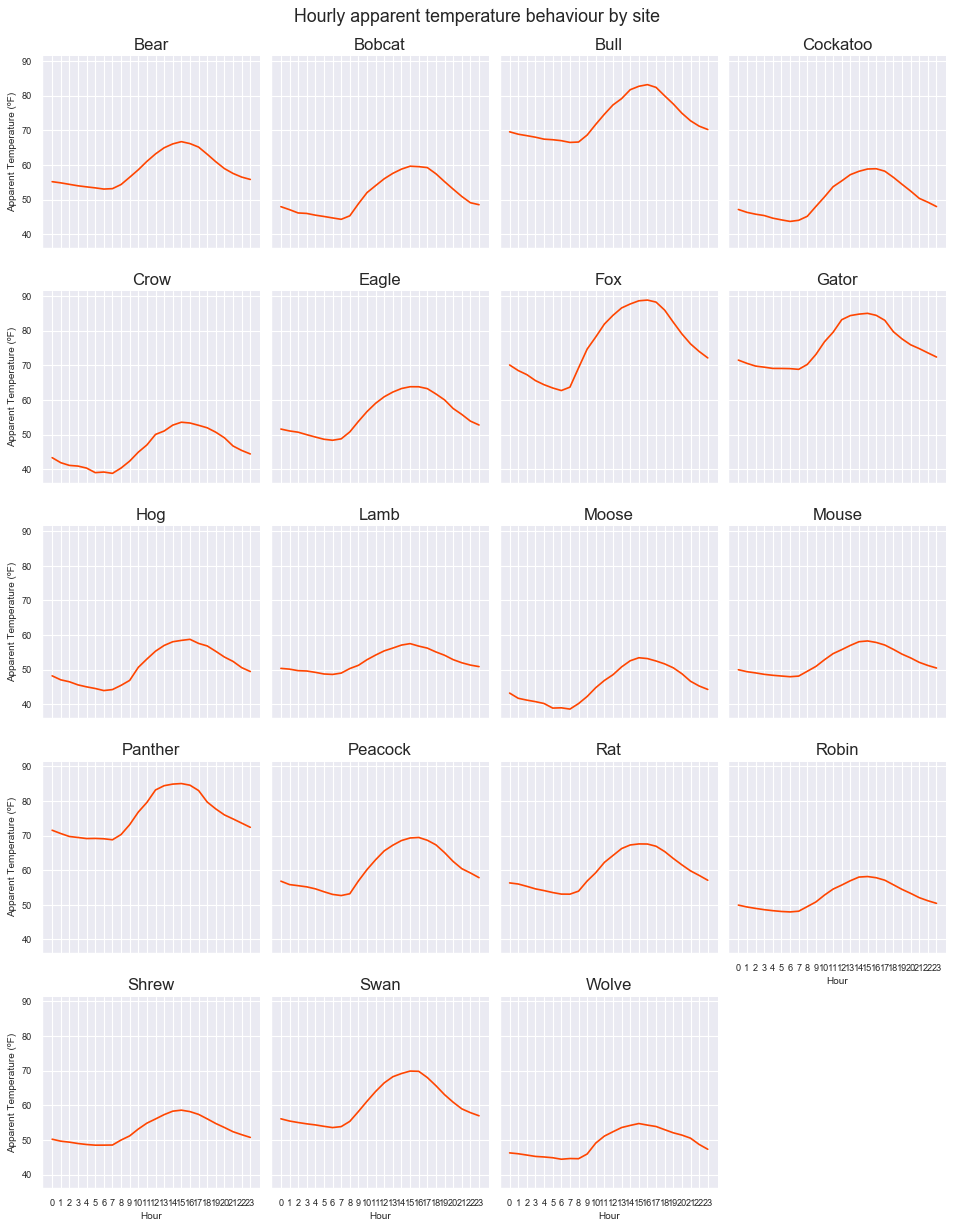

In [59]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 0.75)
# Creates a temporal dataframe grouped by site and hour
temp = pd.DataFrame(weather.groupby(["site_id", times.hour]).median()["apparentTemperature"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "apparentTemperature",color=colors[2])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Hour", y_var="Apparent Temperature (ºF)")
g.set(xticks=range(24))
# Figure title
plt.suptitle('Hourly apparent temperature behaviour by site', y=1.02, fontsize=16)

Text(0.5, 1.02, 'Hourly relative humidity behaviour by site')

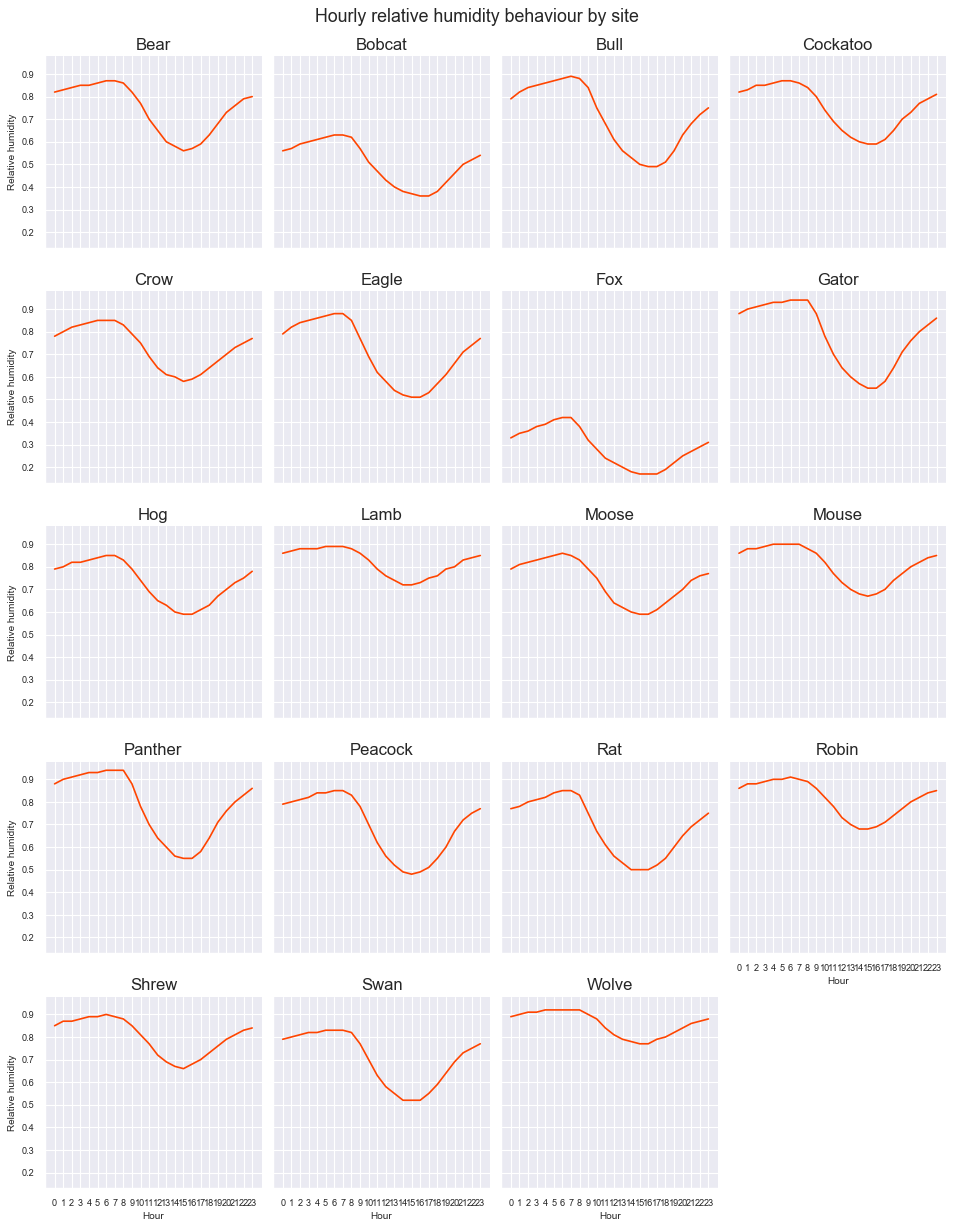

In [60]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 0.75)
# Creates a temporal dataframe grouped by site and hour
temp = pd.DataFrame(weather.groupby(["site_id", times.hour]).median()["humidity"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "humidity", color=colors[2])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Hour", y_var="Relative humidity")
g.set(xticks=range(24))
# Figure title
plt.suptitle('Hourly relative humidity behaviour by site', y=1.02, fontsize=16)

Text(0.5, 1.02, 'Hourly wind speed behaviour by site')

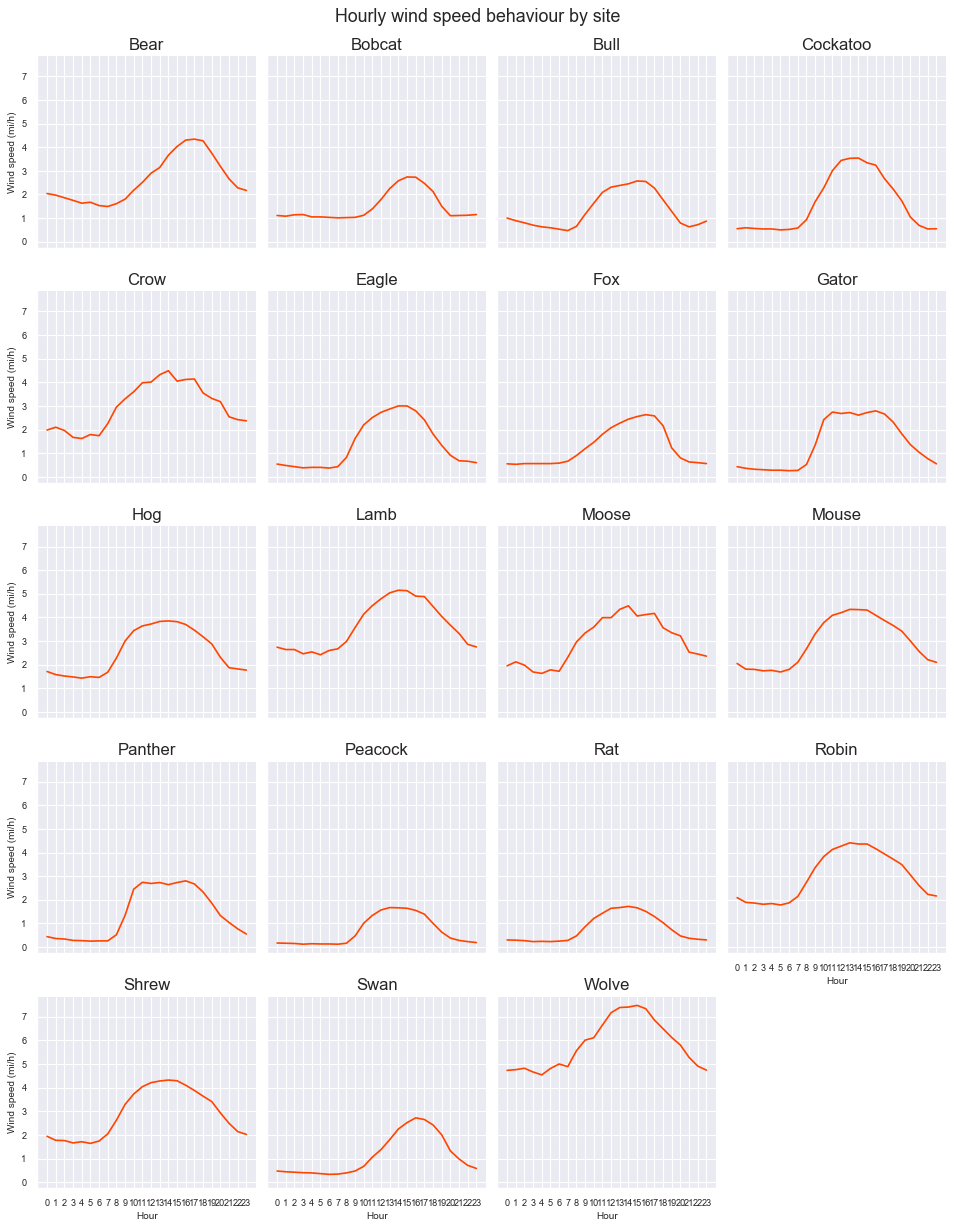

In [61]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 0.75)
# Creates a temporal dataframe grouped by site and hour
temp = pd.DataFrame(weather.groupby(["site_id", times.hour]).median()["windSpeed"]).reset_index()
# All the plots in a grid
g = sns.FacetGrid(temp, col="site_id", col_wrap=4)
g.map(plt.plot, "timestamp", "windSpeed", color=colors[2])
# Title of each plot
g.set_titles("{col_name}", size=15)
# Axis labels
g.set_axis_labels(x_var="Hour", y_var="Wind speed (mi/h)")
g.set(xticks=range(24))
# Figure title
plt.suptitle('Hourly wind speed behaviour by site', y=1.02, fontsize=16)

## Weather data comparisson by year

One of the strategies for prediction could be train with 2016 data and test with 2017. In order to predict 2017 energy meter readings based on weather condition, the distribution of this features should be similar in train and test.

In [18]:
weather2016 = weather[weather["timestamp"] < "2017-01-01 00:00:00"]

In [19]:
weather2017 = weather[weather["timestamp"] >= "2017-01-01 00:00:00"]

### 2016 and 2017 comparisson

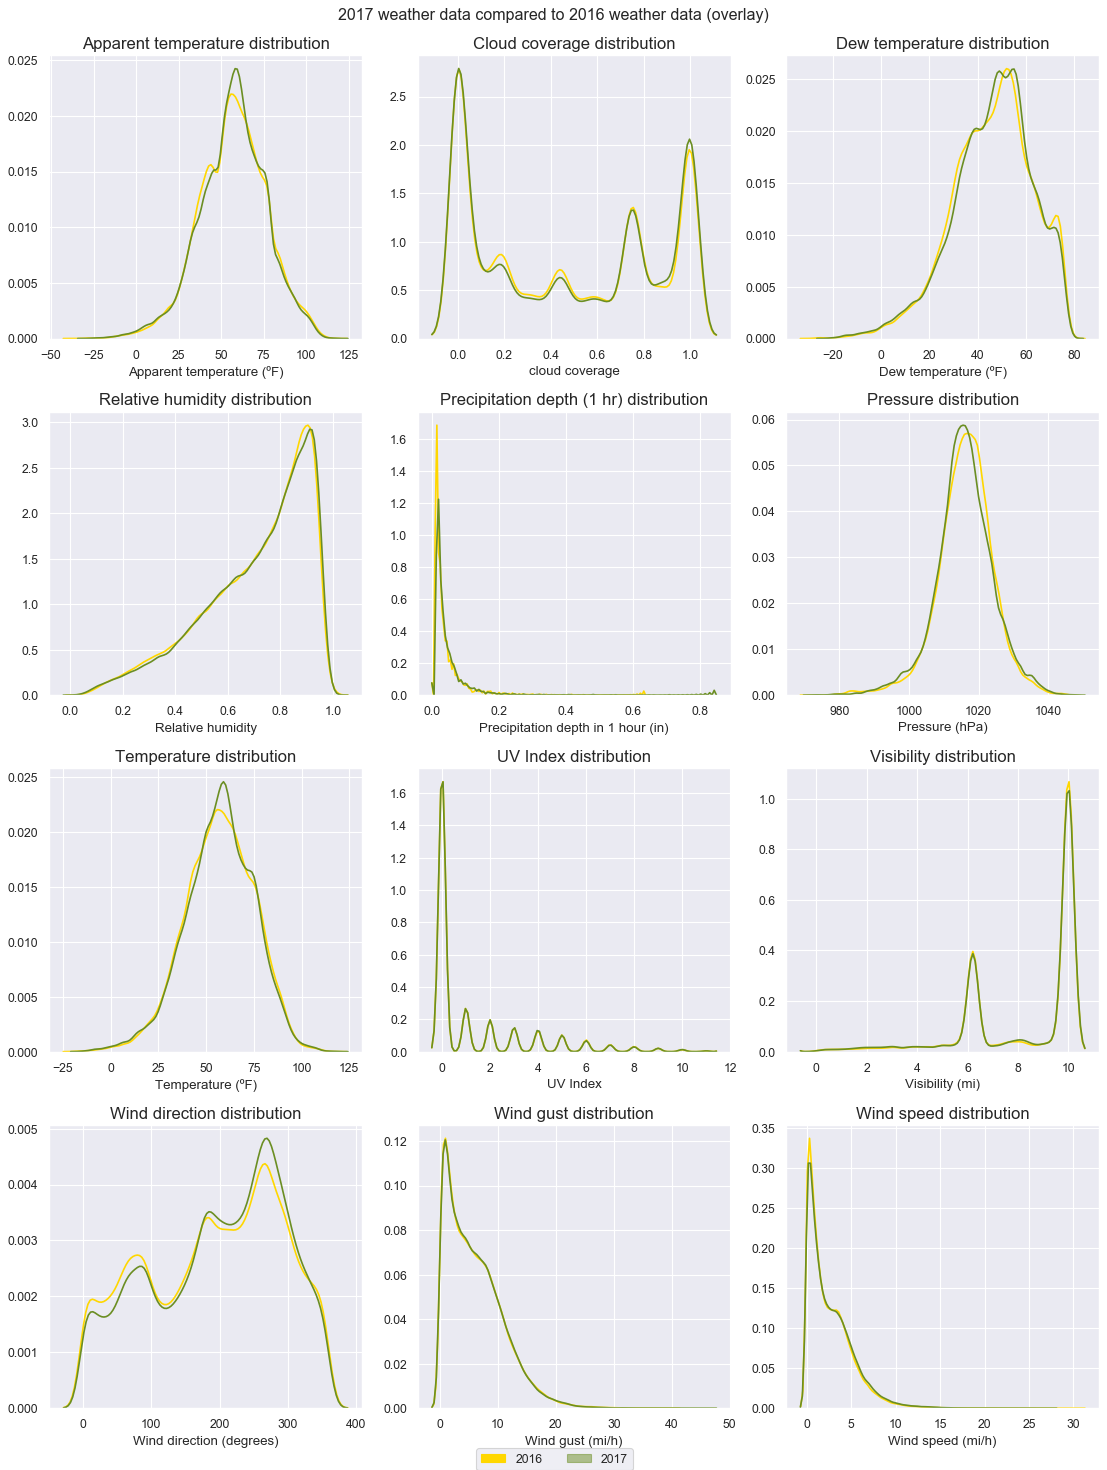

In [20]:
sns.set(rc={'figure.figsize':(14,18)})
#sns.set(font_scale = 1)
f, axes = plt.subplots(4, 3)
axes = axes.flatten()

# "apparentTemperature" histogram
ax1 = axes[0]
g1 = sns.distplot(weather2016["apparentTemperature"].dropna(), ax=ax1, hist=False, color = colors[3])
g1b = sns.distplot(weather2017["apparentTemperature"].dropna(), ax=ax1, hist=False, color = colors[4])
ax1.title.set_text('Apparent temperature distribution')
ax1.set(xlabel="Apparent temperature (ºF)")

# "cloudCover" histogram
ax2 = axes[1]
g2 = sns.distplot(weather2016["cloudCover"].dropna(), ax=ax2, hist=False, color = colors[3])
g2b = sns.distplot(weather2017["cloudCover"].dropna(), ax=ax2, hist=False, color = colors[4])
ax2.title.set_text('Cloud coverage distribution')
ax2.set(xlabel="cloud coverage")

# "dewPoint" histogram
ax3 = axes[2]
g3 = sns.distplot(weather2016["dewPoint"].dropna(), ax=ax3, hist=False, color = colors[3])
g3b = sns.distplot(weather2017["dewPoint"].dropna(), ax=ax3, hist=False, color = colors[4])
ax3.title.set_text('Dew temperature distribution')
ax3.set(xlabel="Dew temperature (ºF)")

# "humidity" histogram
ax4 = axes[3]
g4 = sns.distplot(weather2016["humidity"].dropna(), ax=ax4, hist=False, color = colors[3])
g4b = sns.distplot(weather2017["humidity"].dropna(), ax=ax4, hist=False, color = colors[4])
ax4.title.set_text('Relative humidity distribution')
ax4.set(xlabel="Relative humidity")

# "precipIntensity" histogram
ax5 = axes[4]
g5 = sns.distplot(weather2016["precipIntensity"].dropna(), ax=ax5, hist=False, color = colors[3])
g5b = sns.distplot(weather2017["precipIntensity"].dropna(), ax=ax5, hist=False, color = colors[4])
ax5.title.set_text('Precipitation depth (1 hr) distribution')
ax5.set(xlabel="Precipitation depth in 1 hour (in)")

# "pressure" histogram
ax6 = axes[5]
g6 = sns.distplot(weather2016["pressure"].dropna(), ax=ax6, hist=False, color = colors[3])
g6b = sns.distplot(weather2017["pressure"].dropna(), ax=ax6, hist=False, color = colors[4])
ax6.title.set_text('Pressure distribution')
ax6.set(xlabel="Pressure (hPa)")

# "Temperature" histogram
ax7 = axes[6]
g7 = sns.distplot(weather2016["temperature"].dropna(), ax=ax7, hist=False, color = colors[3])
g7b = sns.distplot(weather2017["temperature"].dropna(), ax=ax7, hist=False, color = colors[4])
ax7.title.set_text('Temperature distribution')
ax7.set(xlabel="Temperature (ºF)")

# "uvIndex" histogram
ax8 = axes[7]
g8 = sns.distplot(weather2016["uvIndex"].dropna(), ax=ax8, hist=False, color = colors[3])
g8b = sns.distplot(weather2017["uvIndex"].dropna(), ax=ax8, hist=False, color = colors[4])
ax8.title.set_text('UV Index distribution')
ax8.set(xlabel="UV Index")

# "visibility" histogram
ax9 = axes[8]
g9 = sns.distplot(weather2016["visibility"].dropna(), ax=ax9, hist=False, color = colors[3])
g9b = sns.distplot(weather2017["visibility"].dropna(), ax=ax9, hist=False, color = colors[4])
ax9.title.set_text('Visibility distribution')
ax9.set(xlabel="Visibility (mi)")

# "windBearing" histogram
ax10 = axes[9]
g10 = sns.distplot(weather2016["windBearing"].dropna(), ax=ax10, hist=False, color = colors[3])
g10b = sns.distplot(weather2017["windBearing"].dropna(), ax=ax10, hist=False, color = colors[4])
ax10.title.set_text('Wind direction distribution')
ax10.set(xlabel="Wind direction (degrees)")

# "windGust" histogram
ax11 = axes[10]
g11 = sns.distplot(weather2016["windGust"].dropna(), ax=ax11, hist=False, color = colors[3])
g11b = sns.distplot(weather2017["windGust"].dropna(), ax=ax11, hist=False, color = colors[4])
ax11.title.set_text('Wind gust distribution')
ax11.set(xlabel="Wind gust (mi/h)")

# "windSpeed" histogram
ax12 = axes[11]
g12 = sns.distplot(weather2016["windSpeed"].dropna(), ax=ax12, hist=False, color = colors[3])
g12b = sns.distplot(weather2017["windSpeed"].dropna(), ax=ax12, hist=False, color = colors[4])
ax12.title.set_text('Wind speed distribution')
ax12.set(xlabel="Wind speed (mi/h)")

# Sets fontsize
for ax in axes:
    ax.title.set_size(15)
    
# Customizes legend and title
blue_patch = mpatches.Patch(color=colors[3], label='2016')
orange_patch = mpatches.Patch(color=colors[4], label='2017', alpha=0.5)
f.legend(handles=[blue_patch, orange_patch], ncol=2, loc=[0.43, 0])

f.suptitle("2017 weather data compared to 2016 weather data (overlay)", x = 0.5, y = 1.01)
f.tight_layout()

In [21]:
f.savefig("..\\figures\\weather_year.pdf", bbox_inches='tight')
f.savefig("..\\figures\\weather_year.png", dpi=72, bbox_inches='tight')